In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import accuracy_score


#ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("emails.csv")

In [3]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)


df.head()

Email No.  the  to  ect  and  for  of    a  you  hou  in  on  is  this   
0   Email 1    0   0    1    0    0   0    2    0    0   0   0   1     0  \
1   Email 2    8  13   24    6    6   2  102    1   27  18  21  13     0   
2   Email 3    0   0    1    0    0   0    8    0    0   4   2   0     0   
3   Email 4    0   5   22    0    5   1   51    2   10   1   5   9     2   
4   Email 5    7   6   17    1    5   2   57    0    9   3  12   2     2   

   enron   i  be  that  will  have  with  your  at  we   s  are  it  by  com   
0      0   2   0     0     0     0     0     0   0   0   3    0   0   0    0  \
1      1  61   4     2     0     0     2     0  12   9  95    4   3   3    3   
2      0   8   0     0     0     0     0     0   2   0   2    0   0   0    0   
3      0  16   2     0     0     1     1     0   2   1  36    3   1   2    0   
4      0  30   8     0     0     2     0     0   7   0  19    2   4   2    0   

   as  from  gas  or  not  me  deal  if  meter  hpl  please  re    e  any   
0   1     0    0   0    0   0     0   0      0    0       0   2    4    0  \
1  12     3    1  21    1  12     0   1      0    0       2  15  141    0   
2   2     0    2   0    0   0     0   0      0    0       0   0    3    0   
3   2     3    0  10    2   5     2   0      1    0       0  10   79    0   
4   4     1    2   6    0   6     0   0      3    0       1  10   71    0   

   our  corp  can   d  all  has  was  know  need  an  forwarded  new   t  may   
0    0     0    0   0    0    0    0     0     0   0          0    0   4    0  \
1   21     1    1  39    1    0    0     0     0  14          3    0  91    0   
2    0     0    0   3    0    0    0     0     0   0          0    0   3    0   
3    0     0    1  21    0    2    0     0     0   3          2    0  49    0   
4    0     0    1  11    8    0    1     0     0   9          2    0  63    0   

   up  j  mmbtu  should  do  am  get  out  see  no  there  price  daren  but   
0   0  1      0       0   0   0    0    0    0   0      0      0      0    0  \
1   2  8      0       0   0   7    2    1    1   5      0      0      3    0   
2   0  1      0       0   1   0    0    0    0   2      0      0      0    0   
3   0  5      0       0   1   9    0    0    1   3      0      0      2    0   
4   0  3      0       1   0   1    1    0    0   9      3      0      1    0   

   been  company   l  these  let  so  would   m  into  xls  farmer  attached   
0     0        0   0      0    0   0      0   2     0    0       0         0  \
1     0        0  35      0    0   7      1  46     0    0       3         1   
2     0        0   4      0    0   0      0   2     0    0       0         0   
3     1        0  27      0    0   1      0  24     0    0       1         0   
4     1        0  34      1    0   0      0  30     0    0       0         0   

   us  information  they  message  day  time  my  one  what  only  http  th   
0   0            0     0        0    0     0   0    0     0     0     0   0  \
1   2            0     0        0    2     2   1    3     0     0     0  15   
2   0            0     0        0    0     0   0    0     0     0     0   0   
3   0            0     0        0    1     0   0    1     0     0     0   4   
4   0            0     0        0    0     0   0    0     0     0     0  12   

   volume  mail  contract  which  month  more  robert  sitara  about  texas   
0       0     0         0      0      0     0       0       0      0      0  \
1       0     1         0      0      0     0       0       0      1      0   
2       0     0         0      0      0     0       0       0      0      0   
3       1     0         0      0      0     0       0       0      0      0   
4       3     0         4      0      0     0       0       0      0      0   

   nom  energy  pec  questions  www  deals  volumes  pm  ena  now  their   
0    0       0    0          0    0      0        0   0    0    0      0  \
1    2       0    2          0    0      0        

In [4]:
df["Prediction"].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [5]:
df.shape

(5172, 3002)

<Axes: >

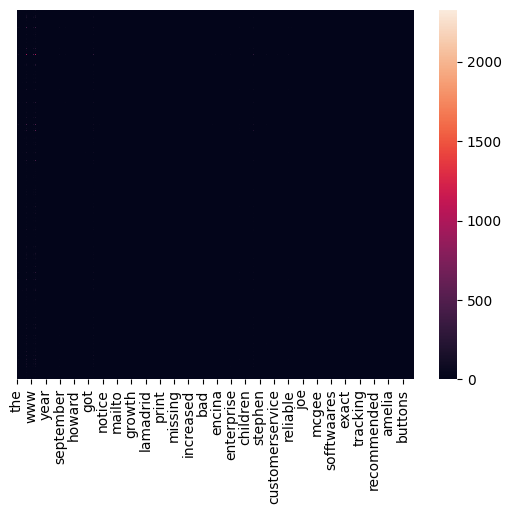

In [6]:
sns.heatmap(df.drop("Email No.",axis=1),yticklabels=False)

<Axes: xlabel='Prediction', ylabel='count'>

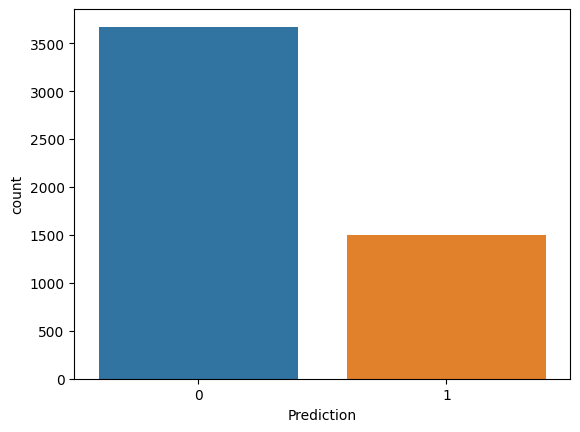

In [7]:
sns.countplot(x="Prediction",data=df)
#1 for spam and 0 for not spam

In [8]:
df.isnull().sum()

Email No.           0
the                 0
to                  0
ect                 0
and                 0
for                 0
of                  0
a                   0
you                 0
hou                 0
in                  0
on                  0
is                  0
this                0
enron               0
i                   0
be                  0
that                0
will                0
have                0
with                0
your                0
at                  0
we                  0
s                   0
are                 0
it                  0
by                  0
com                 0
as                  0
from                0
gas                 0
or                  0
not                 0
me                  0
deal                0
if                  0
meter               0
hpl                 0
please              0
re                  0
e                   0
any                 0
our                 0
corp                0
can       

In [9]:
df.describe()

the           to          ect          and          for   
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  \
mean      6.640565     6.188128     5.143852     3.075599     3.124710   
std      11.745009     9.534576    14.101142     6.045970     4.680522   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     1.000000   
50%       3.000000     3.000000     1.000000     1.000000     2.000000   
75%       8.000000     7.000000     4.000000     3.000000     4.000000   
max     210.000000   132.000000   344.000000    89.000000    47.000000   

                of            a          you          hou           in   
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  \
mean      2.627030    55.517401     2.466551     2.024362    10.600155   
std       6.229845    87.574172     4.314444     6.967878    19.281892   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    12.000000     0.000000     0.000000     1.000000   
50%       1.000000    28.000000     1.000000     0.000000     5.000000   
75%       2.000000    62.250000     3.000000     1.000000    12.000000   
max      77.000000  1898.000000    70.000000   167.000000   223.000000   

                on           is         this        enron            i   
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  \
mean     10.935808     5.386118     1.388631     1.335267    45.857889   
std      17.999402     9.144407     2.849708     4.570525    77.832221   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     0.000000     0.000000     8.000000   
50%       5.000000     2.000000     0.000000     0.000000    22.000000   
75%      12.000000     6.000000     2.000000     1.000000    49.000000   
max     302.000000   111.000000    36.000000   146.000000   972.000000   

                be         that         will         have         with   
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  \
mean      3.229312     0.924401     0.850928     0.804718     0.939675   
std       5.045836     2.084255     2.065738     1.444839     2.036278   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       4.000000     1.000000     1.000000     1.000000     1.000000   
max      67.000000    26.000000    53.000000    17.000000    26.000000   

              your           at           we            s          are   
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  \
mean      0.814385     6.932328     1.978732    41.811872     1.408546   
std       2.001731    12.949766     3.719254    66.530032     2.583277   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     8.000000     0.000000   
50%       0.000000     3.000000     1.000000    20.000000     0.000000   
75%       1.000000     7.000000     2.000000    46.000000     2.000000   
max      20.000000   267.000000    63.000000   882.000000    31.000000   

                it           by          com           as         from   
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  \
mean      4.501160     0.657386     1.767208     4.807425     0.813998   
std       8.377237     1.247460    11.002626     7.568755     1.657193   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     1.000000     0.000000   
50%       2.000000     0.000000     0.000000     2.000000     0.000000   
75%       5.000000     1.000000     1.000000     6.000000     1.000000   
max     131.000000    14.000000   726.000000   135.000000    21.000000   

             

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [11]:
x=df.iloc[:,1:3001]
x.head()
y=df.iloc[:,3001:]
y.head()
x.head()

the  to  ect  and  for  of    a  you  hou  in  on  is  this  enron   i  be   
0    0   0    1    0    0   0    2    0    0   0   0   1     0      0   2   0  \
1    8  13   24    6    6   2  102    1   27  18  21  13     0      1  61   4   
2    0   0    1    0    0   0    8    0    0   4   2   0     0      0   8   0   
3    0   5   22    0    5   1   51    2   10   1   5   9     2      0  16   2   
4    7   6   17    1    5   2   57    0    9   3  12   2     2      0  30   8   

   that  will  have  with  your  at  we   s  are  it  by  com  as  from  gas   
0     0     0     0     0     0   0   0   3    0   0   0    0   1     0    0  \
1     2     0     0     2     0  12   9  95    4   3   3    3  12     3    1   
2     0     0     0     0     0   2   0   2    0   0   0    0   2     0    2   
3     0     0     1     1     0   2   1  36    3   1   2    0   2     3    0   
4     0     0     2     0     0   7   0  19    2   4   2    0   4     1    2   

   or  not  me  deal  if  meter  hpl  please  re    e  any  our  corp  can   
0   0    0   0     0   0      0    0       0   2    4    0    0     0    0  \
1  21    1  12     0   1      0    0       2  15  141    0   21     1    1   
2   0    0   0     0   0      0    0       0   0    3    0    0     0    0   
3  10    2   5     2   0      1    0       0  10   79    0    0     0    1   
4   6    0   6     0   0      3    0       1  10   71    0    0     0    1   

    d  all  has  was  know  need  an  forwarded  new   t  may  up  j  mmbtu   
0   0    0    0    0     0     0   0          0    0   4    0   0  1      0  \
1  39    1    0    0     0     0  14          3    0  91    0   2  8      0   
2   3    0    0    0     0     0   0          0    0   3    0   0  1      0   
3  21    0    2    0     0     0   3          2    0  49    0   0  5      0   
4  11    8    0    1     0     0   9          2    0  63    0   0  3      0   

   should  do  am  get  out  see  no  there  price  daren  but  been  company   
0       0   0   0    0    0    0   0      0      0      0    0     0        0  \
1       0   0   7    2    1    1   5      0      0      3    0     0        0   
2       0   1   0    0    0    0   2      0      0      0    0     0        0   
3       0   1   9    0    0    1   3      0      0      2    0     1        0   
4       1   0   1    1    0    0   9      3      0      1    0     1        0   

    l  these  let  so  would   m  into  xls  farmer  attached  us   
0   0      0    0   0      0   2     0    0       0         0   0  \
1  35      0    0   7      1  46     0    0       3         1   2   
2   4      0    0   0      0   2     0    0       0         0   0   
3  27      0    0   1      0  24     0    0       1         0   0   
4  34      1    0   0      0  30     0    0       0         0   0   

   information  they  message  day  time  my  one  what  only  http  th   
0            0     0        0    0     0   0    0     0     0     0   0  \
1            0     0        0    2     2   1    3     0     0     0  15   
2            0     0        0    0     0   0    0     0     0     0   0   
3            0     0        0    1     0   0    1     0     0     0   4   
4            0     0        0    0     0   0    0     0     0     0  12   

   volume  mail  contract  which  month  more  robert  sitara  about  texas   
0       0     0         0      0      0     0       0       0      0      0  \
1       0     1         0      0      0     0       0       0      1      0   
2       0     0         0      0      0     0       0       0      0      0   
3       1     0         0      0      0     0       0       0      0      0   
4       3     0         4      0      0     0       0       0      0      0   

   nom  energy  pec  questions  www  deals  volumes  pm  ena  now  their   
0    0       0    0          0    0      0        0   0    0    0      0  \
1    2       0    2          0    0      0        0   0    0    1      0   
2    2       0    0          0    0

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [13]:
print(f"{x_train.shape} shape of x_train")
print(f"{x_test.shape} shape of x_test")
print(f"{y_train.shape} shape of y_train")
print(f"{y_test.shape} shape of y_test")

(4137, 3000) shape of x_train
(1035, 3000) shape of x_test
(4137, 1) shape of y_train
(1035, 1) shape of y_test


In [14]:
from sklearn.metrics import r2_score


model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

r2_score(y_test,y_pred)

-2518861.4699307685

In [15]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100,criterion="log_loss",max_depth=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy is ",acc*100 )

Accuracy is  97.487922705314


In [16]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion="log_loss",splitter="random",max_depth=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy is ",acc*100 ,"%")

Accuracy is  91.69082125603865 %


In [17]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,CategoricalNB,ComplementNB



model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy using GaussianNB ",acc*100 ,"%")

model=MultinomialNB(alpha=0.0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy using MultinomialNB ",acc*100 ,"%")

model=BernoulliNB(alpha=0.0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy using BernoulliNB ",acc*100 ,"%")



Accuracy using GaussianNB  94.78260869565217 %
Accuracy using MultinomialNB  97.19806763285024 %
Accuracy using BernoulliNB  92.65700483091788 %


In [18]:
#using k fold cross validation

from sklearn.model_selection import KFold,cross_val_score

model=DecisionTreeClassifier()
kf=KFold(n_splits=5)
score=cross_val_score(model,x,y,cv=kf)

print("score using DecisionTreeClassifier ",score)
print("\n")
print("avg of folded accuracy ",score.mean())

score using DecisionTreeClassifier  [0.89661836 0.93429952 0.92069632 0.92263056 0.8762089 ]


avg of folded accuracy  0.9100907315523413


In [19]:
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier()
kf=KFold(n_splits=5)
score=cross_val_score(model,x,y,cv=kf)

print("score using GradientBoostingClassifier ",score)
print("\n")
print("avg of folded accuracy ",score.mean())


score using GradientBoostingClassifier  [0.952657   0.95942029 0.94874275 0.96808511 0.93907157]


avg of folded accuracy  0.9535953428830395


In [20]:
from sklearn.svm import SVC

model=SVC()
kf=KFold(n_splits=5)
score=cross_val_score(model,x,y,cv=kf)

print("score using GradientBoostingClassifier ",score)
print("\n")
print("avg of folded accuracy ",score.mean())


score using GradientBoostingClassifier  [0.83574879 0.82512077 0.79303675 0.77466151 0.75628627]


avg of folded accuracy  0.7969708182659155
